In [1]:
import pandas as pd
df = pd.read_csv("../data_raw/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
df.to_csv("../data_clean/clean_diabetesdata.csv", index=False)

### a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../data_clean/clean_diabetesdata.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
np.random.seed(42)

In [11]:
sample_df = df.sample(n=25)

In [12]:
sample_mean_glucose = sample_df['Glucose'].mean()
sample_highest_glucose = sample_df['Glucose'].max()

In [13]:
population_mean_glucose = df['Glucose'].mean()
population_highest_glucose = df['Glucose'].max()

In [14]:
labels = ['Mean Glucose', 'Highest Glucose']
sample_stats = [sample_mean_glucose, sample_highest_glucose]
population_stats = [population_mean_glucose, population_highest_glucose]

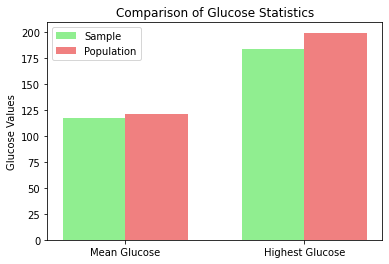

In [20]:
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

sample_bars = ax.bar(index - bar_width/2, sample_stats, bar_width, label='Sample', color='lightgreen')
population_bars = ax.bar(index + bar_width/2, population_stats, bar_width, label='Population', color='lightcoral')

ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Statistics')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

In [22]:
sample_df = df.sample(n=25)

In [25]:
sample_98th_percentile_bmi = np.percentile(sample_df['BMI'], 98)
population_98th_percentile_bmi = np.percentile(df['BMI'], 98)

In [29]:
labels = ['BMI(98th Percentile)']
sample_stats = [sample_98th_percentile_bmi]
population_stats = [population_98th_percentile_bmi]

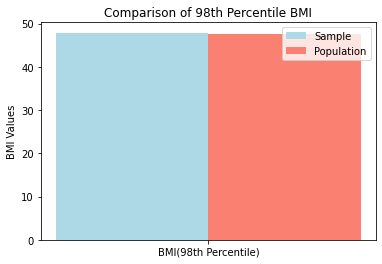

In [30]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

sample_bars = ax.bar(x - width/2, sample_stats, width, label='Sample', color='lightblue')
population_bars = ax.bar(x + width/2, population_stats, width, label='Population', color='salmon')

ax.set_ylabel('BMI Values')
ax.set_title('Comparison of 98th Percentile BMI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison

In [31]:
num_samples = 500
sample_size = 150

In [32]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

In [37]:
for _ in range(num_samples):
   
    bootstrap_sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_std = bootstrap_sample.std()
    bootstrap_percentile = np.percentile(bootstrap_sample, 75)
    
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile)

population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 75)

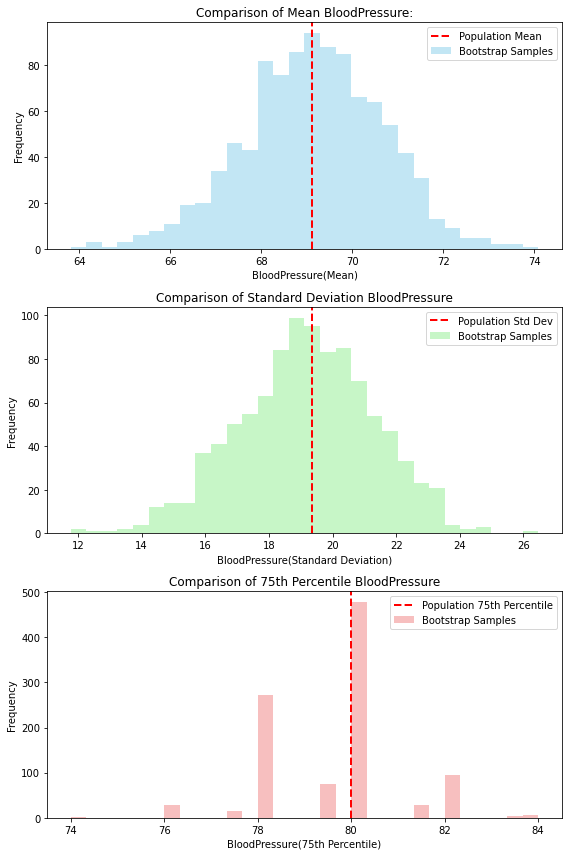

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].hist(bootstrap_means, bins=30, alpha=0.5, label='Bootstrap Samples', color='skyblue')
axes[0].axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[0].set_title('Comparison of Mean BloodPressure:')
axes[0].set_xlabel('BloodPressure(Mean)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(bootstrap_stds, bins=30, alpha=0.5, label='Bootstrap Samples', color='lightgreen')
axes[1].axvline(population_std, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
axes[1].set_title('Comparison of Standard Deviation BloodPressure')
axes[1].set_xlabel('BloodPressure(Standard Deviation)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

axes[2].hist(bootstrap_percentiles, bins=30, alpha=0.5, label='Bootstrap Samples', color='lightcoral')
axes[2].axvline(population_percentile, color='red', linestyle='dashed', linewidth=2, label='Population 75th Percentile')
axes[2].set_title('Comparison of 75th Percentile BloodPressure')
axes[2].set_xlabel('BloodPressure(75th Percentile)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()